In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
housing = fetch_california_housing()

In [3]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
model = Sequential([
    Dense(96, activation="relu",kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(48, activation="relu", kernel_regularizer=l2(0.01)),
    Dense(1)
])

In [6]:
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.0005))

In [7]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3)
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_valid, y_valid), callbacks=[early_stop])

Epoch 1/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1332 - val_loss: 2.2594
Epoch 2/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5794 - val_loss: 1.2794
Epoch 3/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2241 - val_loss: 1.0543
Epoch 4/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0708 - val_loss: 0.9788
Epoch 5/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0050 - val_loss: 0.8825
Epoch 6/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9031 - val_loss: 0.8285
Epoch 7/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8605 - val_loss: 0.8838
Epoch 8/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8456 - val_loss: 0.7929
Epoch 9/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7862 - val_loss: 0.7184
Epoch 10/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7424 - val_loss: 0.7500
Epoch 11/100
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7673 - val_loss: 0.7773
Epoch 12/100
182/182 ━━━━━━━━━━━━━━━━━━━━

In [10]:
mse = model.evaluate(x_test, y_test, verbose=0)
print(mse)

0.3728894293308258


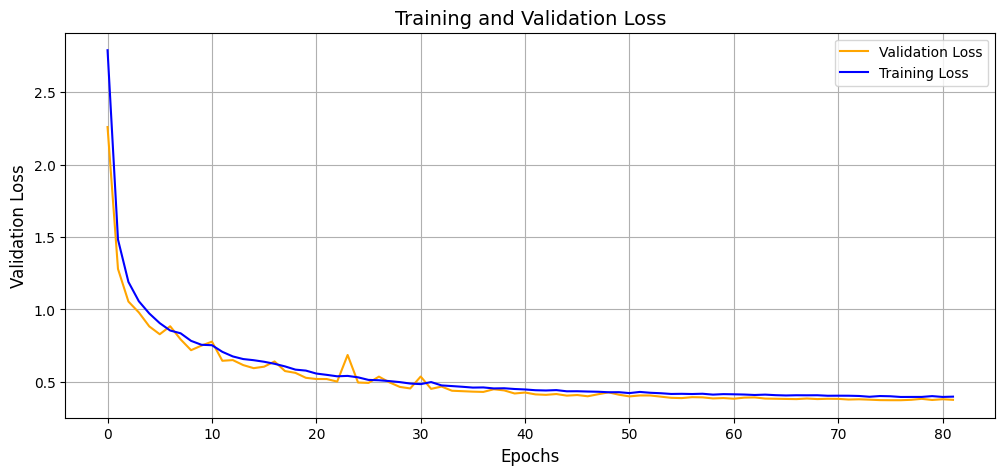

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

plt.plot(history.history["val_loss"], label="Validation Loss", color="orange")
plt.plot(history.history["loss"], label="Training Loss", color="blue")
plt.title("Training and Validation Loss", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation Loss", fontsize=12)
plt.legend()
plt.grid(True)